#  I.A- Analise e Pre Processamento

 # Inteligência Artificial - Trabalho Prático Pré-Processamento e Análise de Dados

                        Breno Henrique Alves Freire Mizael

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

data = pd.read_csv('kr-vs-kp.data')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
#print(data.head(5))

1.  ✔️Identificação do atributo alvo (saída);

        -O atributo alvo é a coluna com o nome "saida", a qual é representada pelos valores won ou nowin.


2.  ✔️Identificação dos tipos de dados dos atributos de entrada (quantitativo, qualitativo);
    
    -Todos atributos de entrada são do tipo qualitativo, essa observação pode ser feita ao observar visualmente os atributos e perceber, por exemplo que eles têm Valores Discretos, Representação Textual e não têm ordem. Também podemos perceber isso ao executar o código de verificação de tipos implementado abaixo:


In [3]:
df = pd.DataFrame(data)
tipos_dados = df.dtypes

tipos_unicos = tipos_dados.unique()

if len(tipos_unicos) == 1:
    tipo_comum = tipos_unicos[0]
    if tipo_comum == 'object':
        print("Todos são do tipo: qualitativo")
    else:
        print("Todos são do tipo: quantitativo")
else:
    for coluna, tipo in tipos_dados.items():
        if tipo == 'object':
            print(f"{coluna}: qualitativo")
        else:
            print(f"{coluna}: quantitativo")

Todos são do tipo: qualitativo


3.  ✔️Identificação da escala de dados dos atributos de entrada (nominal, ordinal, intervalar,
racional);

    - A escala de todos atributos de entrada é Nominal,  pervebemos isso ao observar visualmente os atributos e perceber, por exemplo que eles não têm uma relação de ordem. Também podemos perceber isso ao executar o código de verificação de escala implementado abaixo:

In [4]:
# Identificando a escala dos atributos
escalas = set()
atributos_classificados = {}

for coluna in data.columns:
    tipo_dado = str(data[coluna].dtype)
    
    if tipo_dado == 'object':
        escalas.add('Nominal')
        atributos_classificados[coluna] = 'Nominal'
    elif tipo_dado == 'int64':
        escalas.add('Ordinal')
        atributos_classificados[coluna] = 'Ordinal'
    elif tipo_dado == 'float64':
        escalas.add('Racional')
        atributos_classificados[coluna] = 'Racional'

if len(escalas) == 1:
    print(f"Todos os atributos são {escalas.pop()}")
else:
    for atributo, classificacao in atributos_classificados.items():
        print(f"O atributo {atributo} é {classificacao}")


Todos os atributos são Nominal


4.  ✔️Exploração dos dados através de medidas de localidade;

    - Para fazer as explorações de dados, principalmente de localidade, temos primeiramente que fazer a conversão dos tipos de dados que são todos nominais, para numéricos  pois a maioria das explorações são feitas atraves de dados numericos.

In [5]:
import pandas as pd

# Criar um novo DataFrame para armazenar os atributos binarizados
data_binario = data.copy()

# Criar um dicionário para mapear os valores nominais para valores numéricos
mapping = {}

# Aplicar o mapeamento no novo DataFrame
for column in data_binario.columns:
    if data_binario[column].dtype == 'object':
        unique_values = data_binario[column].unique()
        mapping[column] = {value: index + 1 for index, value in enumerate(unique_values)}
        data_binario[column] = data_binario[column].map(mapping[column])

# Exibir o resultado
data_binario.to_csv('resultado_binario.csv', index=False)
         

    
    - Agora podemos fazer algumas medidas de localidade mais comuns, como média, mediana e moda, dadas abaixo, no código também está representado o numero pelo qual cada letra foi substituida na conversão de nominal para numérica:



In [6]:
dataNumeric = pd.read_csv('resultado.csv')
# Calcular a média
media = dataNumeric.mean()
#print("Média:", media)

# Calcular a mediana
mediana = dataNumeric.median()
#print("Mediana:", mediana)

# Calcular a moda
moda = dataNumeric.mode()
#print("Moda:", moda)

print("Média, Mediana e Moda de cada atributo:")
for column in dataNumeric.columns:
    print()
    print(f"{column}: Média={media[column]}, Mediana={mediana[column]}, Moda={moda[column].values[0]}")
  
  
    for value, number in mapping[column].items():
        print(f"{value} - {number}")
       

Média, Mediana e Moda de cada atributo:

coluna1: Média=1.1117021276595744, Mediana=1.0, Moda=1
f - 1
t - 2

coluna2: Média=1.0704005006257822, Mediana=1.0, Moda=1
f - 1
t - 2

coluna3: Média=1.037546933667084, Mediana=1.0, Moda=1
f - 1
t - 2

coluna4: Média=1.1007509386733416, Mediana=1.0, Moda=1
f - 1
t - 2

coluna5: Média=1.333854818523154, Mediana=1.0, Moda=1
f - 1
t - 2

coluna6: Média=1.4612015018773468, Mediana=1.0, Moda=1
f - 1
t - 2

coluna7: Média=1.3660826032540676, Mediana=1.0, Moda=1
f - 1
t - 2

coluna8: Média=1.2177722152690864, Mediana=1.0, Moda=1
f - 1
t - 2

coluna9: Média=1.3804755944931164, Mediana=1.0, Moda=1
f - 1
t - 2

coluna10: Média=1.303817271589487, Mediana=1.0, Moda=1
f - 1
t - 2

coluna11: Média=1.431476846057572, Mediana=1.0, Moda=1
f - 1
t - 2

coluna12: Média=1.1051314142678348, Mediana=1.0, Moda=1
f - 1
t - 2

coluna13: Média=1.3100750938673342, Mediana=1.0, Moda=1
l - 1
g - 2

coluna14: Média=1.0046933667083855, Mediana=1.0, Moda=1
f - 1
t - 2

coluna


5.  ✔️Exploração dos dados através de medidas de espalhamento;

    -Seguem as principais medias de espelhamento, calculadas para todos atributos
    

In [7]:
import numpy as np
# Desvio padrão usando NumPy
std_dev_np = np.std(dataNumeric)
print("Desvio padrão :", std_dev_np)

# Desvio padrão usando pandas
df = pd.DataFrame(dataNumeric)
std_dev_pd = df.std().values[0]
#print("Desvio padrão (pandas):", std_dev_pd)

# Variância usando NumPy
variance_np = np.var(dataNumeric)
print("\n\nVariância:", variance_np)

# Variância usando pandas
variance_pd = df.var().values[0]
#print("Variância (pandas):", variance_pd)

# Amplitude usando NumPy
amplitude_np = np.max(dataNumeric) - np.min(dataNumeric)
print("\n\nAmplitude:", amplitude_np)

# Amplitude usando pandas
amplitude_pd = df.max().values[0] - df.min().values[0]
#print("Amplitude (pandas):", amplitude_pd)

Desvio padrão : coluna1     0.315000
coluna2     0.255821
coluna3     0.190098
coluna4     0.300999
coluna5     0.471589
coluna6     0.498492
coluna7     0.481732
coluna8     0.412732
coluna9     0.485504
coluna10    0.459905
coluna11    0.495282
coluna12    0.306723
coluna13    0.462524
coluna14    0.068347
coluna15    0.584512
coluna16    0.215473
coluna17    0.171550
coluna18    0.463670
coluna19    0.089828
coluna20    0.357867
coluna21    0.386444
coluna22    0.400188
coluna23    0.232337
coluna24    0.485886
coluna25    0.058566
coluna26    0.461096
coluna27    0.227503
coluna28    0.017686
coluna29    0.120373
coluna30    0.201848
coluna31    0.381485
coluna32    0.227503
coluna33    0.485194
coluna34    0.483346
coluna35    0.442007
coluna36    0.431191
saida       0.499506
dtype: float64


Variância: coluna1     0.099225
coluna2     0.065444
coluna3     0.036137
coluna4     0.090600
coluna5     0.222396
coluna6     0.248495
coluna7     0.232066
coluna8     0.170347
coluna9    


6.  ✔️Exploração dos dados através de medidas de distribuição;

Segue exploração do percentil e do Boxplot


Percentis:
           coluna1      coluna2      coluna3      coluna4      coluna5  \
count  3196.000000  3196.000000  3196.000000  3196.000000  3196.000000   
mean      1.111702     1.070401     1.037547     1.100751     1.333855   
std       0.315049     0.255861     0.190128     0.301046     0.471662   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       1.000000     1.000000     1.000000     1.000000     1.000000   
50%       1.000000     1.000000     1.000000     1.000000     1.000000   
75%       1.000000     1.000000     1.000000     1.000000     2.000000   
90%       2.000000     1.000000     1.000000     2.000000     2.000000   
95%       2.000000     2.000000     1.000000     2.000000     2.000000   
99%       2.000000     2.000000     2.000000     2.000000     2.000000   
max       2.000000     2.000000     2.000000     2.000000     2.000000   

           coluna6      coluna7      coluna8      coluna9     coluna10  ...  \
count  3196.000000  3

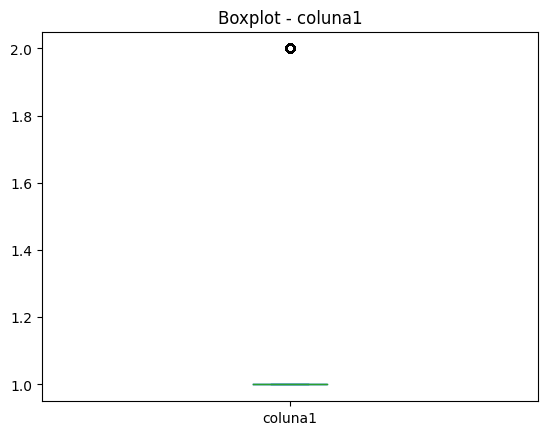

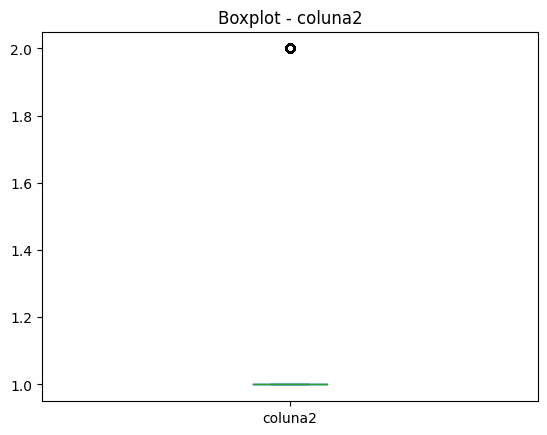

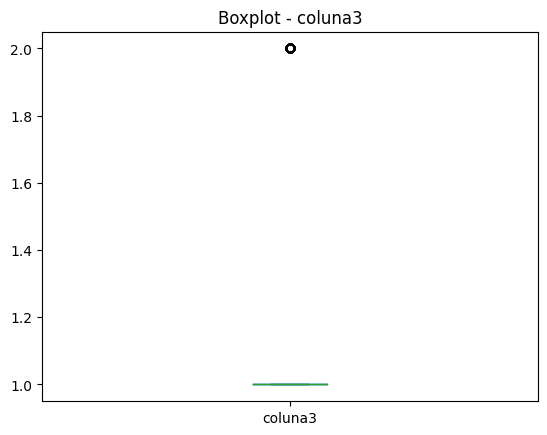

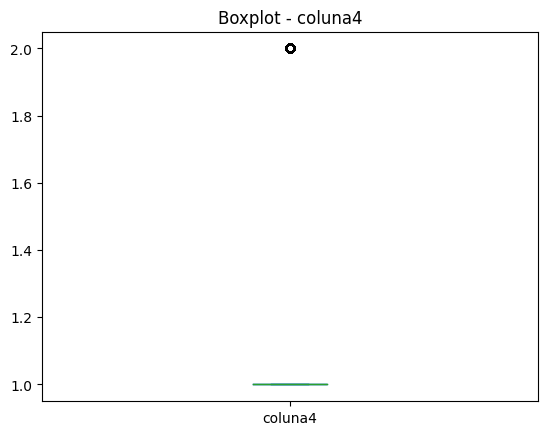

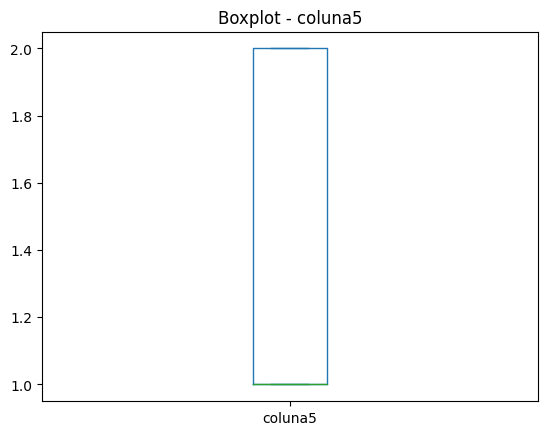

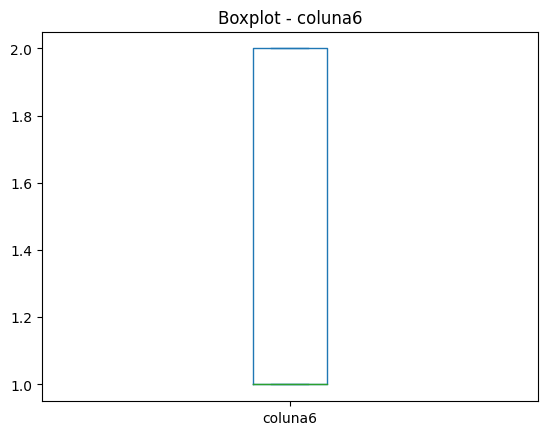

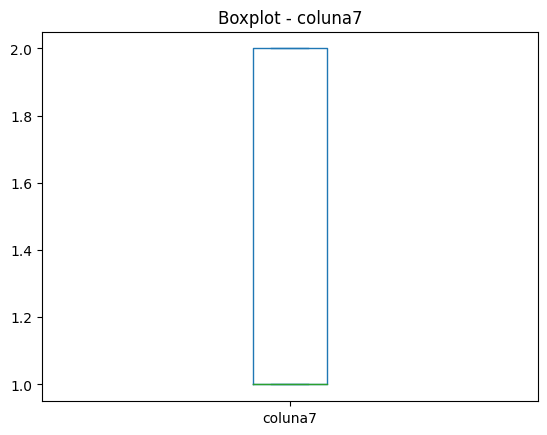

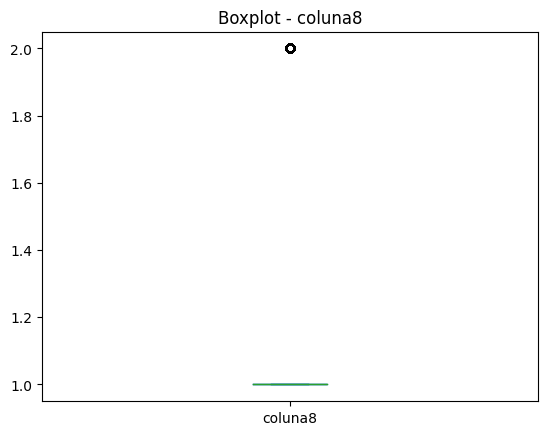

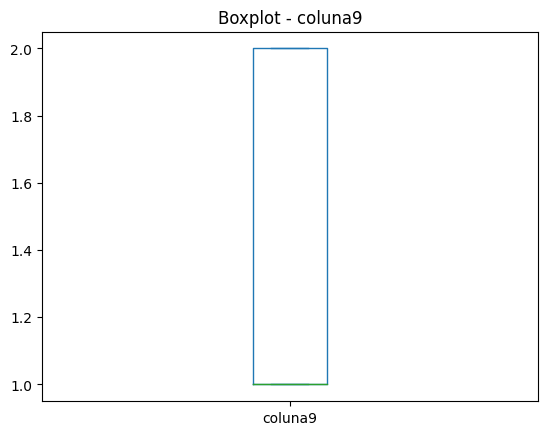

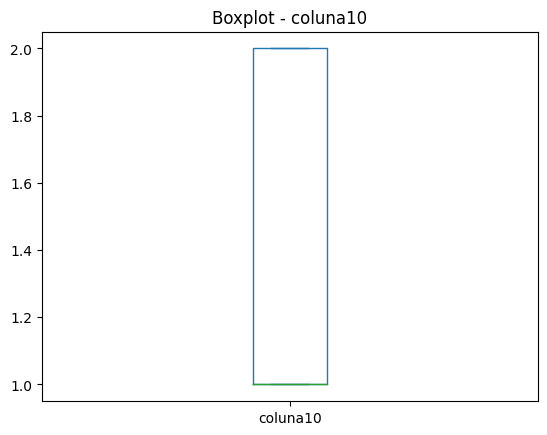

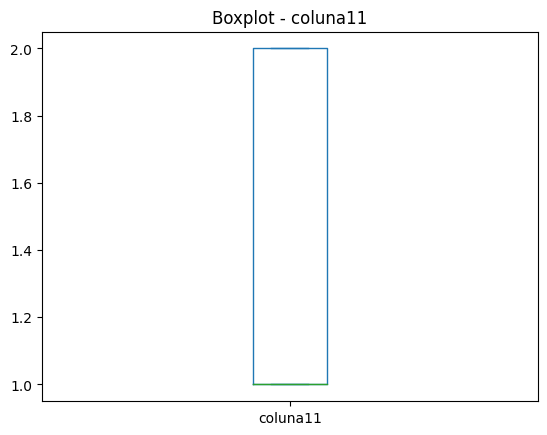

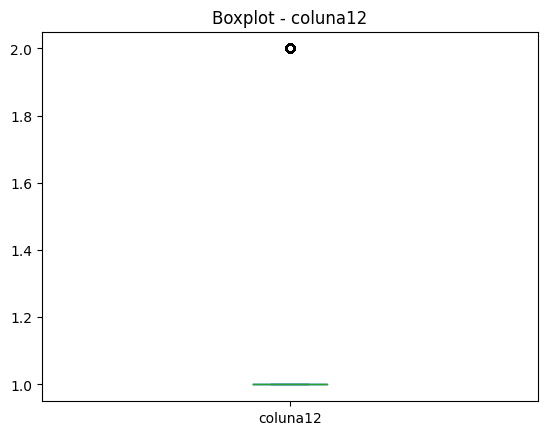

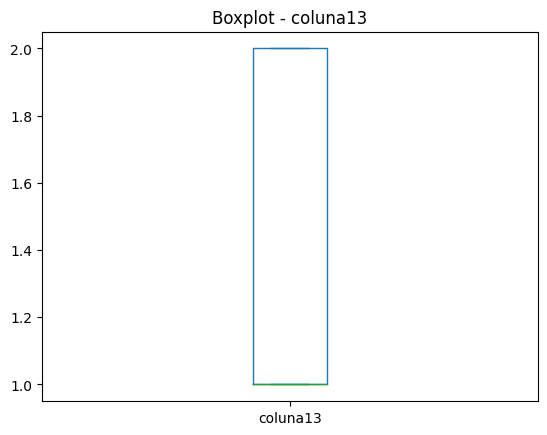

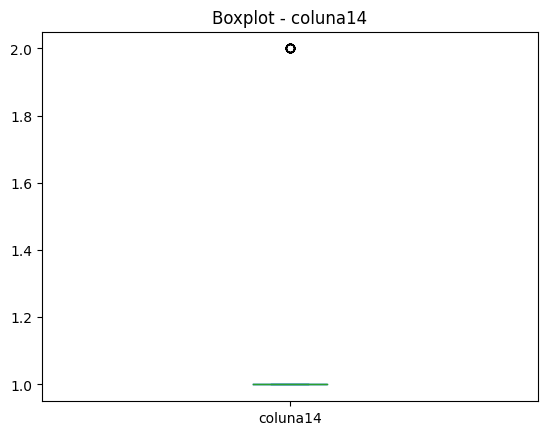

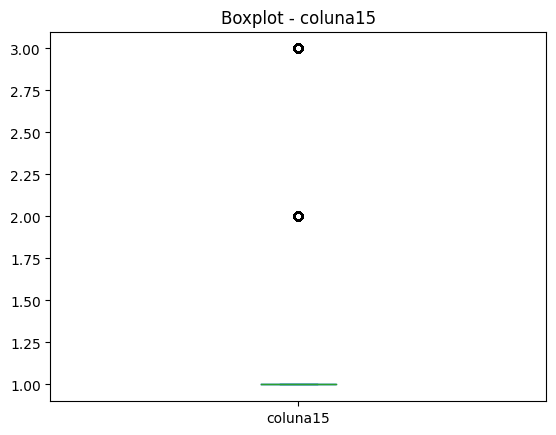

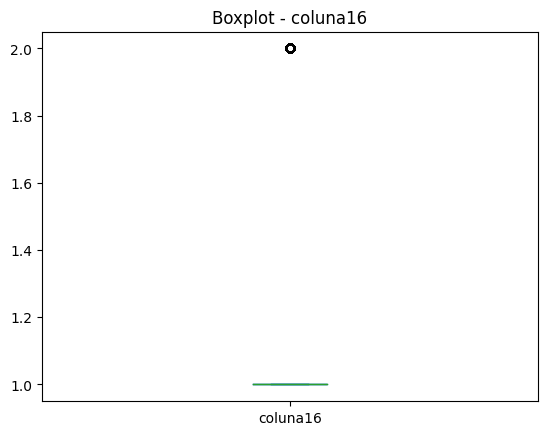

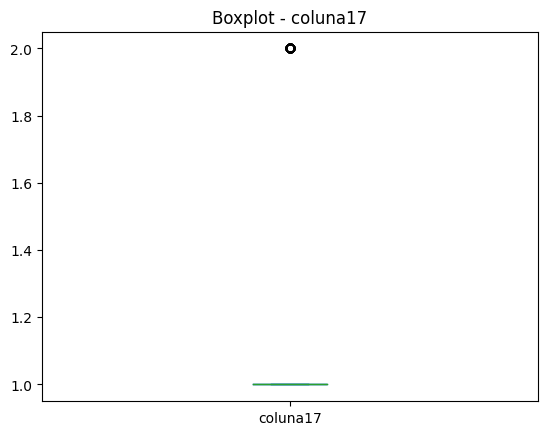

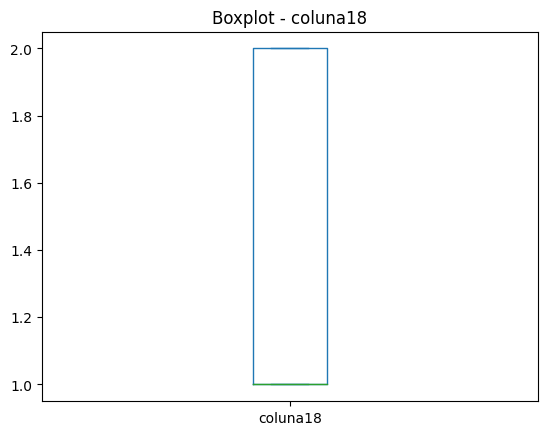

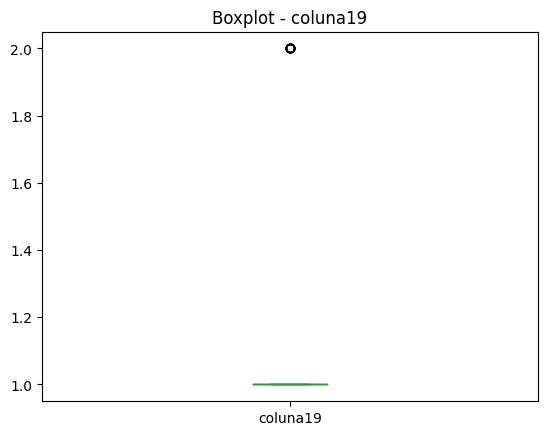

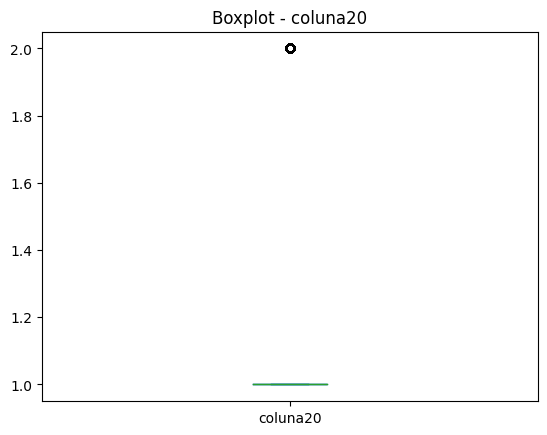

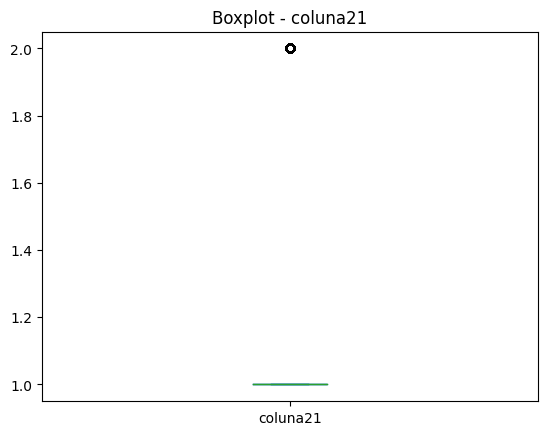

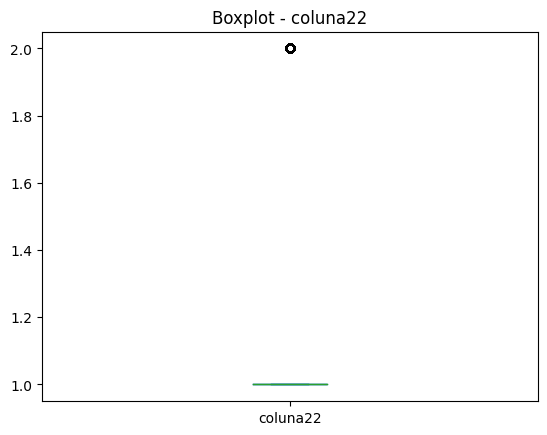

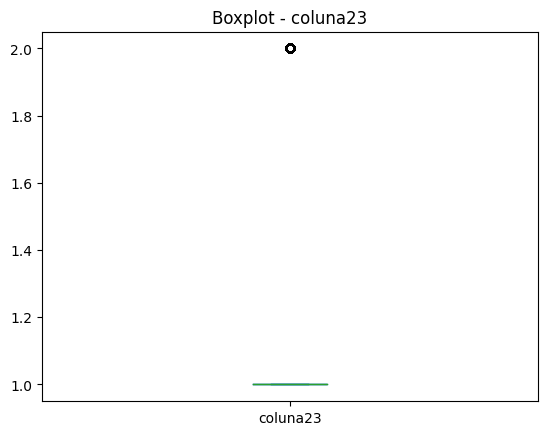

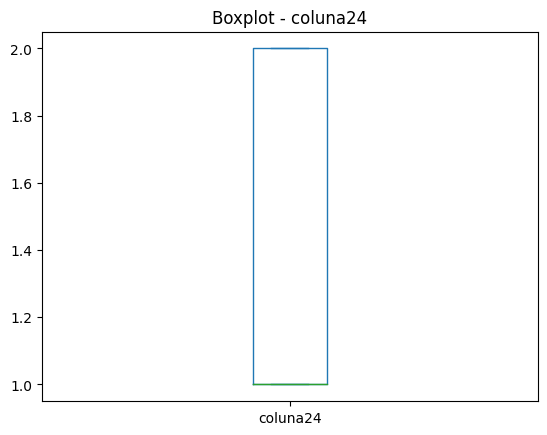

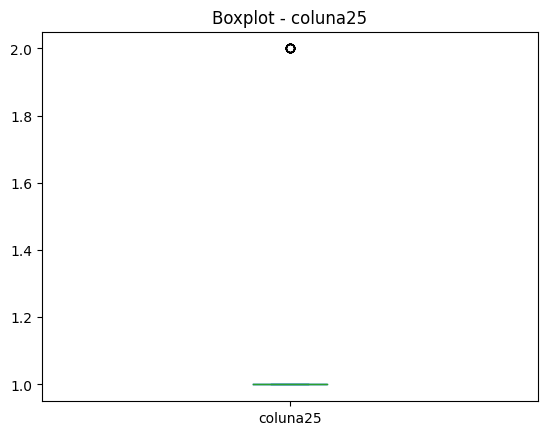

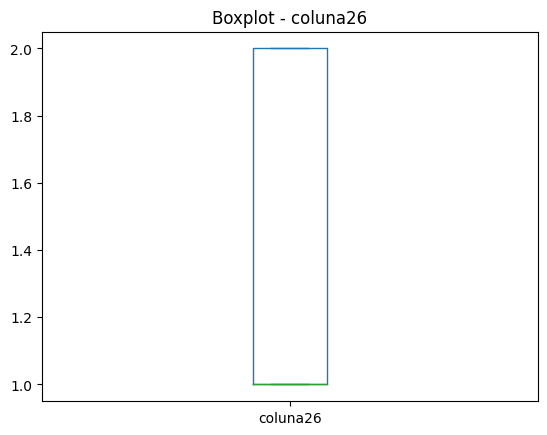

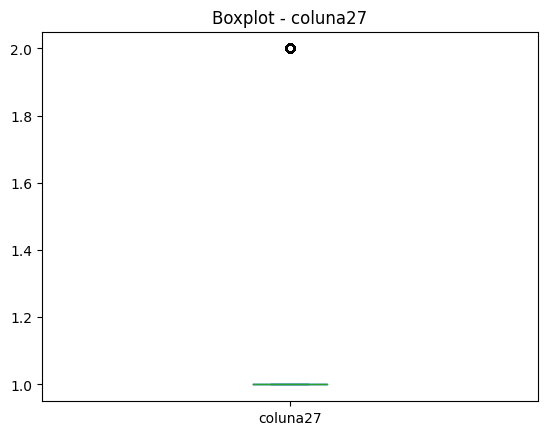

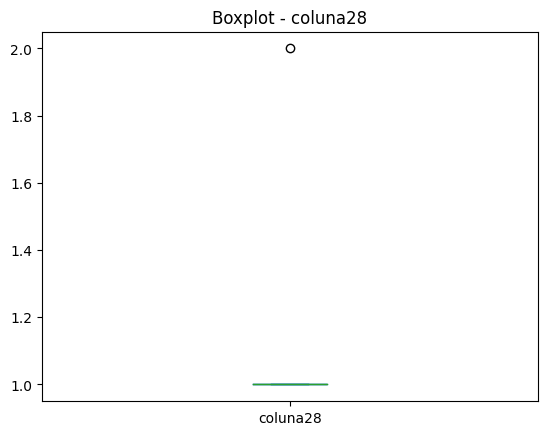

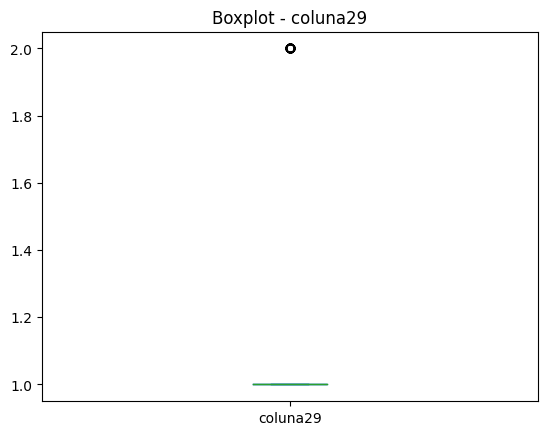

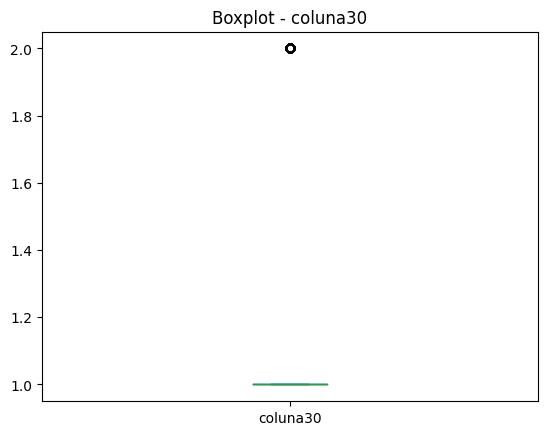

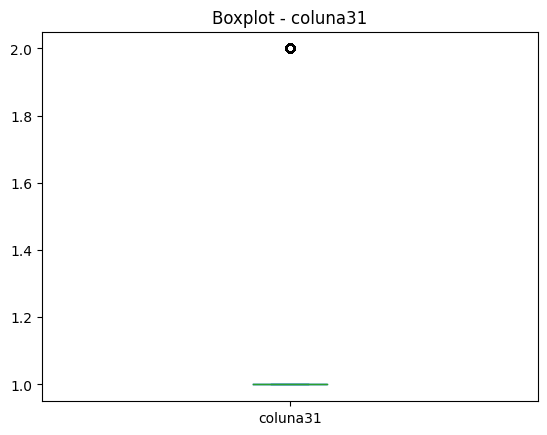

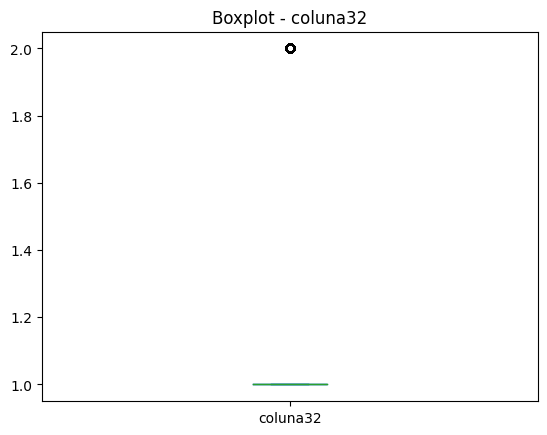

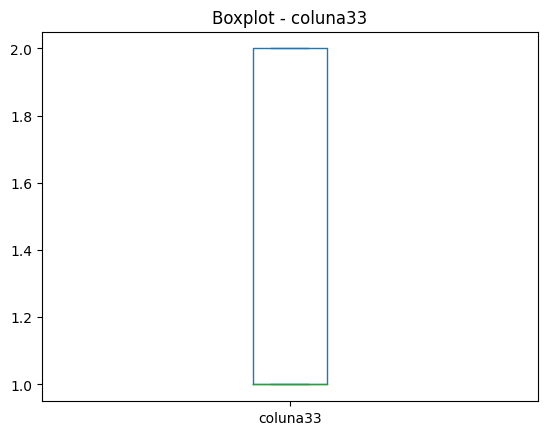

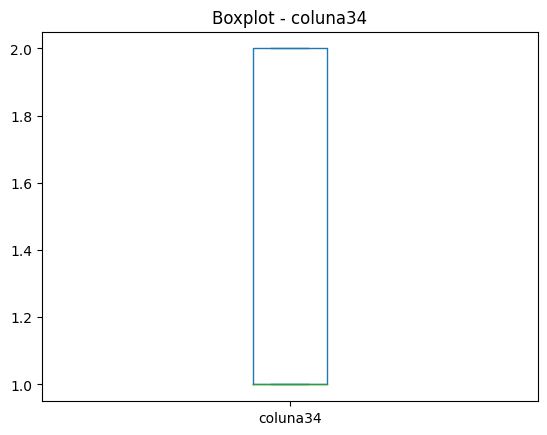

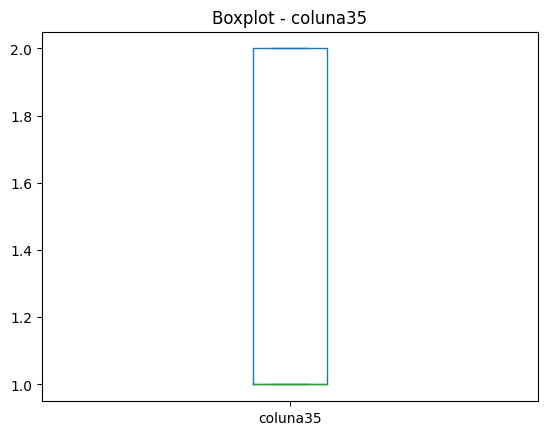

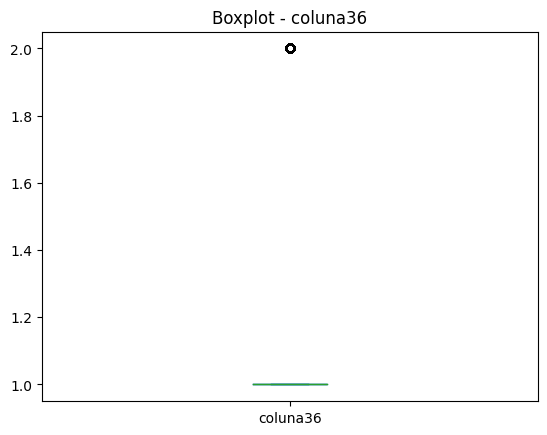

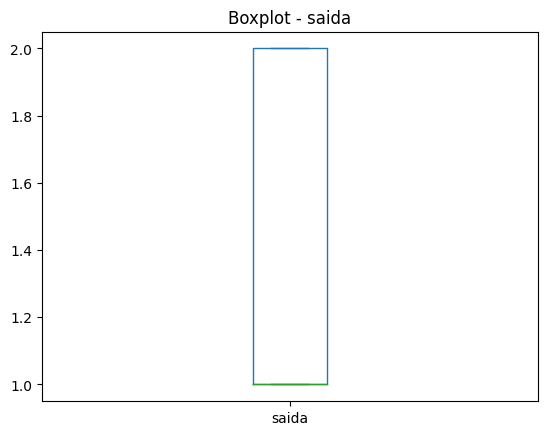

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


# Calcular os percentis
percentis = dataNumeric.describe(percentiles=[.25, .50, .75, .90, .95, .99])

# Exibir os percentis
print("Percentis:")
print(percentis)

# Gerar boxplot para cada coluna
for column in dataNumeric.columns:
    plt.figure()
    dataNumeric[column].plot(kind='box')
    plt.title(f'Boxplot - {column}')
    plt.show()



7.  ✔️Identificação e separação do conjunto de teste, que será utilizado para testar o desempenho
dos modelos – o conjunto de testes deve ser representativo e ter as características da
população completa. Caso sua base de dados já tenha o conjunto de teste definido, analisar
se este segue as características do conjunto de treinamento;

    -Vamos fazer a amostragem aleatória estratificada usada na função train_test_split, na implementação ela esta gerando um conjunto teste que representa 20% do conjunto inicial e consequentemente um conjunto de treinamento que representa os outros 80% do conjunto inicial. A base de dados dada, tem uma grande quantidade de amostras e isso nos permite fazer o conjunto teste de 20% das amostras dadas, pois não vai prejudicar nem causar complicações na base de dados.
    
    A separação foi feita usando na função train_test_split que ajuda a tornar o conjunto de teste mais representativo da população completa. O parâmetro stratify=y garante que as proporções das classes no conjunto de teste sejam mantidas, o que é importante para preservar a distribuição das características da população.


In [9]:
#Separando conjunto de treinamento e de teste
X = data.iloc[:, :-1]  # Atributos (todas as colunas, exceto a última)
y = data.iloc[:, -1]   # Coluna de saída (última coluna)
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


8.  ✔️Identificação e eliminação de atributos não necessários;


    - Todos os atributos da base de dados são necessários porque cada um deles descreve características específicas do jogo e contribui para a compreensão abrangente do contexto em questão. Cada atributo na base de dados fornece informações exclusivas sobre diferentes aspectos do jogo, como a posição das peças, a configuração do tabuleiro, as ameaças e oportunidades estratégicas, entre outros. Ao incluir todos esses atributos, garantimos que nenhum detalhe relevante seja ignorado e que o modelo possa capturar relações complexas entre os elementos do jogo.

9.  ✔️Identificação e eliminação de exemplos não necessários;

    Após observar a base de dados, percebemos que os exemplos são relevantes para a análise que pretendemos realizar, pois por se tratar de uma base de xadrez, cada dado tem uma importancia relevante, por representar uma jogada. 
    Podemos fazer a remoção de dados duplicados, pois nesse caso podemos tomar como verdade que não ha necessiadade de vermos a mesma jogada na base de dados, essa remoção é executada no código abaixo. E podemos observar ao executar o código, que não é identificada, nenhuma linha duplicada, portanto nessa base de dados não consideraremos nenhum exemplo como não necessário.
    

In [10]:
# Verificando a existência de dados duplicados
duplicated_count = len(data[data.duplicated()])
if duplicated_count == 0:
    print("A base não contém dados duplicados.")
else:
    print(f"A base contém {duplicated_count} dados duplicados.")

# Removendo dados duplicados
data = data.drop_duplicates()

# Imprimindo o tamanho da base de dados após a remoção
print(f"Tamanho da base de dados após a remoção de duplicatas: {len(data)}")

A base não contém dados duplicados.
Tamanho da base de dados após a remoção de duplicatas: 3196


10.  ✔️Análise e aplicação de técnicas de amostragem de dados (caso não seja necessário, analisar
o porquê);

    -Para a base de dados dada, acredito que não seja muito necessária a realização de tecnicas de amostragem de dados, pois uma base de 36 atributos com 3196 amostras ja está bem representada, até porque, se diminuirmos muito o numero de amostras, ficariamos com uma quantidade muito desproporcional de amostras com relação a dimencionalidade.
    Contudo, abaixo tem um exemplo de Análise aleatória simples que podemos utilizar e ébem interessante para bases como essa do xadrez que contêm muitos atributos, ja que ela não é feita baseada em atributos específicos.
    É importante ressaltar que, ao realizar a amostragem aleatória simples, a amostra pode não representar exatamente todas as características e proporções presentes no conjunto de dados original. No entanto, espera-se que, em média, a amostra se assemelhe à população em termos das características analisadas.

In [11]:
# Definir o tamanho da amostra desejada
tamanho_amostra = 1500

# Aplicar a amostragem aleatória simples
amostra = data.sample(n=tamanho_amostra, random_state=1)

# Exibir a amostra
print(amostra.head())


     coluna1 coluna2 coluna3 coluna4 coluna5 coluna6 coluna7 coluna8 coluna9  \
990        f       f       f       f       f       t       f       f       f   
2242       f       f       f       f       f       t       f       f       t   
340        f       f       f       f       t       t       t       t       t   
1144       f       f       f       f       f       t       f       f       t   
321        f       f       f       f       f       t       f       f       t   

     coluna10  ... coluna28 coluna29 coluna30 coluna31 coluna32 coluna33  \
990         f  ...        f        f        f        t        f        t   
2242        f  ...        f        f        f        t        f        f   
340         f  ...        f        f        f        f        f        f   
1144        f  ...        f        f        f        f        f        t   
321         f  ...        f        f        f        f        f        f   

     coluna34 coluna35 coluna36  saida  
990         t        

11.  ✔️Identificação e aplicação de técnicas para minimizar problemas de desbalanceamento (caso
não seja necessário, analisar o porquê);

    -  Primeiramente é importante avaliar o atributo de saida possui um número suficiente de instâncias para ser considerada representativa na análise, quando vemos que as ocorrências de won, esão bem próximas das ocorrências de nowin, como representado no código abaixo. 

In [12]:
# Defina o nome da coluna desejada
column_name = "saida"

# Use o método value_counts() para contar as ocorrências da coluna especificada
counts = data[column_name].value_counts()

# Imprima apenas o número de repetições
print(f"Coluna: {column_name}")
for value, count in counts.items():
    print(f"{value}: {count}")
print()


Coluna: saida
won: 1669
nowin: 1527



    - Os 36 atributos da base de dados fornecem informações detalhadas sobre o tabuleiro de xadrez em cada instância. Esses atributos podem descrever posições específicas das peças, configurações estratégicas e outras características relevantes. Portanto, mesmo que haja desbalanceamento na distribuição das classes, a riqueza de informações nos atributos pode compensar essa disparidade e permitir que o modelo capture padrões e relações importantes.

12. Limpeza de dados:

a.  ✔️Identificação e eliminação de ruídos ou outliers;
    
    -Uma abordagem comum para identificação e eliminação de ruídos ou outliers, principalmente para bases de dados em que todos atributos são nominais, é a detecção de valores discrepantes com base na frequência dos valores em cada atributo. 
    Na execução implementada abaixo observamos que somente um valor foi considerado como outlier, isso sugere que a maior parte dos valores nos atributos nominais são frequentes na base de dados. 

In [13]:
# Definir o limiar mínimo de ocorrências para um valor ser considerado raro
limiar = 10  # Exemplo: um valor ocorrendo menos de 10 vezes é considerado raro

# Verificar o número de colunas antes da remoção
total_colunas_antes = len(data.columns)

# Identificar os atributos nominais
atributos_nominais = data.columns.tolist()

# Verificar a frequência dos valores em cada atributo nominal
for atributo in atributos_nominais:
    frequencia = data[atributo].value_counts()
    #print(frequencia)

# Remover as colunas que possuem valores raros (outliers)
for atributo in atributos_nominais:
    frequencia = data[atributo].value_counts()
    valores_raros = frequencia[frequencia < limiar].index
    if len(valores_raros) > 0:
        data = data.drop(columns=atributo)

# Verificar o número de colunas depois da remoção
total_colunas_depois = len(data.columns)

# Verificar se alguma coluna foi removida
if total_colunas_antes != total_colunas_depois:
    removidas=total_colunas_antes-total_colunas_depois
    print(f"Foram removidas {removidas} colunas com outliers da base de dados.")
else:
    print("Nenhuma coluna com outliers foi removida da base de dados.")

# Verificar o resultado após a remoção dos outliers
#print(data)

Foram removidas 1 colunas com outliers da base de dados.


b.  ✔️Identificação e eliminação de dados inconsistentes;

    - Podemos verificar que na base de dados não temos valores inconsistentes, pois os valores são nominais, a base de dados tem limitadas opções de possibilidades, por exemplo os valores variam para algumas colunas entre "f" e "t" e nas duas colunas restantes uma varia entre "l" e "g", ja a outra varia entre "n", "w" e "b" .
    Observamos isso através do seguinte código:

In [14]:
import pandas as pd


# Itere sobre as colunas do dataframe
for column in data.columns:
    # Use o método value_counts() para contar as ocorrências de cada atributo na coluna
    counts = data[column].value_counts()
    
    # Imprima apenas o número de repetições
    print(f"Coluna: {column}")
    for value, count in counts.items():
        print(f"{value}: {count}")
    print()


Coluna: coluna1
f: 2839
t: 357

Coluna: coluna2
f: 2971
t: 225

Coluna: coluna3
f: 3076
t: 120

Coluna: coluna4
f: 2874
t: 322

Coluna: coluna5
f: 2129
t: 1067

Coluna: coluna6
f: 1722
t: 1474

Coluna: coluna7
f: 2026
t: 1170

Coluna: coluna8
f: 2500
t: 696

Coluna: coluna9
f: 1980
t: 1216

Coluna: coluna10
f: 2225
t: 971

Coluna: coluna11
f: 1817
t: 1379

Coluna: coluna12
f: 2860
t: 336

Coluna: coluna13
l: 2205
g: 991

Coluna: coluna14
f: 3181
t: 15

Coluna: coluna15
n: 2526
w: 446
b: 224

Coluna: coluna16
f: 3040
t: 156

Coluna: coluna17
f: 3099
t: 97

Coluna: coluna18
t: 2196
f: 1000

Coluna: coluna19
f: 3170
t: 26

Coluna: coluna20
f: 2714
t: 482

Coluna: coluna21
f: 2612
t: 584

Coluna: coluna22
f: 2556
t: 640

Coluna: coluna23
f: 3013
t: 183

Coluna: coluna24
f: 1975
t: 1221

Coluna: coluna25
f: 3185
t: 11

Coluna: coluna26
t: 2216
f: 980

Coluna: coluna27
f: 3021
t: 175

Coluna: coluna29
f: 3149
t: 47

Coluna: coluna30
f: 3060
t: 136

Coluna: coluna31
f: 2631
t: 565

Coluna: co

c.  ✔️Identificação e eliminação de dados redundantes;

    -Podemos observar que a base de dados não tem dados redundantes através do seguinte código, que verifica se a base tem 
    ou não valores duplicados.

In [15]:
# Verificando a existência de dados duplicados
duplicated_count = len(data[data.duplicated()])
if duplicated_count == 0:
    print("A base não contém dados duplicados.")
else:
    print(f"A base contém {duplicated_count} dados duplicados.")

# Removendo dados duplicados
data = data.drop_duplicates()

A base não contém dados duplicados.


d.  ✔️Identificação e resolução de dados incompletos (ausentes) – utilização de alguma
técnica de preenchimento e justificar;

    -Nesta base de dados, não tem ocorrência de dados incompletos (ausentes), como mostrado no código abaixo:

In [16]:
for coluna in data.columns:
    # Verifique os valores únicos na coluna
    valores_unicos = data[coluna].unique()

    # Verifique se há valores ausentes (NaN, None ou vazios)
    if data[coluna].isnull().any():
        print(f"A coluna {coluna} contém valores ausentes.")
else:
    print("Nenhuma coluna contém valores ausentes.")

Nenhuma coluna contém valores ausentes.


13.  ✔️Identificação e conversão dos tipos de dados (caso não seja necessário, analisar o porquê).
Os tipos de conversão que podem ser utilizados são:

    -a. Conversão de tipos (simbólico para numérico, ordinal para numérico, nominal para
    binário, numérico para ordinal);
    Vamos fazer a conversão de nominal para binária, pois na base de dados só tem dados nominais, a técnica usada é chamada codificação one-hot. Essa técnica é amplamente utilizada para converter atributos categóricos em uma representação binária.
    Como a base de dados tem poucos valores únicos(pouca variação de valores), vamos criar uma nova coluna para cada valor único em um atributo nominal.
    Segue a conversão:

In [17]:
# Aplicar codificação one-hot para todos os atributos
dados_codificados = pd.get_dummies(data)

# Exibir os dados codificados
print(dados_codificados.head())

   coluna1_f  coluna1_t  coluna2_f  coluna2_t  coluna3_f  coluna3_t  \
0       True      False       True      False       True      False   
1       True      False       True      False       True      False   
2       True      False       True      False       True      False   
3       True      False       True      False       True      False   
4       True      False       True      False       True      False   

   coluna4_f  coluna4_t  coluna5_f  coluna5_t  ...  coluna33_f  coluna33_t  \
0       True      False       True      False  ...        True       False   
1       True      False      False       True  ...        True       False   
2       True      False      False       True  ...        True       False   
3       True      False       True      False  ...        True       False   
4       True      False       True      False  ...        True       False   

   coluna34_f  coluna34_t  coluna35_f  coluna35_t  coluna36_n  coluna36_t  \
0       False        True  

14. Análise e aplicação de alguma técnica para redução de dimensionalidade – pesquisar
alguma técnica utilizada na literatura e aplicar;

    -Considerando que a base de dados é referente a um jogo de xadrez, cada atributo que representa uma posição no tabuleiro tem um significado e importância específicos. Cada posição contribui para o estado atual do jogo e pode afetar diretamente as decisões e estratégias adotadas. Portanto, remover qualquer um desses atributos pode levar à perda de informações importantes.
    Como observamos, se todos os atributos são exclusivos e não há redundância de informações, não há necessidade de redução de dimensionalidade.